In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FFMpegWriter, FuncAnimation
from FANTASY import geodesic_integrator
from geodesic_metrics import (update_param, 
                              g00, g01, g02, g03, g11, g12, g13, g22, g23, g33, 
                              mag, Newtonian_orbit, 
                              get_orbital_evolution, get_orbital_velocity)
from geodesic_plotting import plot_traj, animate_trajectories
from main import run_simulation, simulate_Newtonian

Delta 0.0202132981717851


  0%|          | 0/35 [00:00<?, ?it/s]

 94%|█████████▍| 33/35 [00:27<00:01,  1.18it/s]

Particle ejected
Final position: [-3.57938916e-05  1.75133923e-05  0.00000000e+00]
Time taken: N=33 out of N=35
This corresonds to about 0.667T_0
Ending program


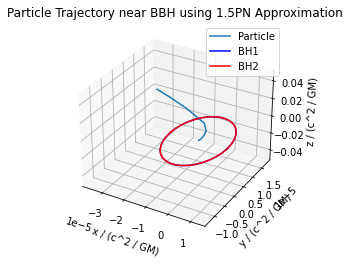

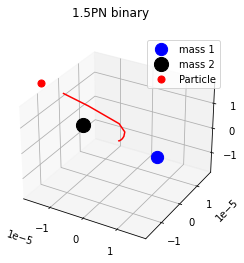

In [2]:
x, y, z, rs_1, rs_2, vs_1, vs_2, vs_12, Param, sol = run_simulation()

plot_traj(x, y, z, rs_1, rs_2, proj="3D")

animate_trajectories(x,y,z,rs_1,rs_2, a=max(x[-1],y[-1]),proj="3D", save_fig=f"3danim_test")

### Constants and units

In [2]:
# Fantasy simulation parameters

omega = 1                   # Do not confuse with angular frequency
order = 4

G = c = 1                   # Geometrized units

# G and c in SI units
c_SI = 3e8
G_SI = 6.67e-11

# Set time scale (in seconds), determines length and mass scales through dimensional analysis
T_0 = 3.14e7                # T_0 [s], 1 year is ~ pi x 10^7 seconds
L_0 = c_SI * T_0            # 3e8 * T_0 [m] ~ 0.002 * T_0 [AU]
M_0 = (c_SI**3 / G_SI) * T_0   # 4.05e35 * T_0 [kg] ~ 2e5 * T_0[solar masses]

# Relevant length and mass scales in geometric units
AU_in_natunits = 1 / (0.002 * T_0)
SOLARMASS_in_natunits = 1 / (2e5 * T_0)



### Example simulation

In [3]:
M, a0 = 1 * SOLARMASS_in_natunits, 1/100 * AU_in_natunits   # Mass of each BH in binary, initial separation
M1, M2 = 1/2*M, 1/3*M                                    # Masses of each BH in binary
e0 = 0.80                                                # Initial eccentricity, e0=0 => circular, c0->1 => highly elliptical

num_orbits = 1
N = 200

q0 = [0.0,a0/2,-a0/2,0.0]                                # Initial position of particle
q0 = [0.,0.,0.,0.]
p0 = [1.0,0.0,0.00,0.0]                                  # Initial velocity of particle

# Spin
chi1, chi2 = -0.1, 0.5
S1, S2 = np.array([1,-1,2]), np.array([-1,-2,3])
S1, S2 = ((chi * M**2 * S / mag(S) if mag(S) != 0 else 0) for chi, S in zip([chi1, chi2], [S1,S2]))

x1, y1, z1, rs_1_1, rs_2_1, vs_1_1, vs_2_1, vs_12_1, Param_1, sol_1 = run_simulation(T_0=T_0, a0=a0, M1=M1, M2=M2, e0=e0, num_orbits=num_orbits, N=N, q0=q0, p0=p0, chi1=chi1, chi2=chi2, S1=S1, S2=S2)


Delta 5.480003703387398e-06


  0%|          | 0/200 [00:00<?, ?it/s]

100%|██████████| 200/200 [02:41<00:00,  1.24it/s]


8.660702156005481e-13 1.7823418729262381e-12 7.971679331320042e-13


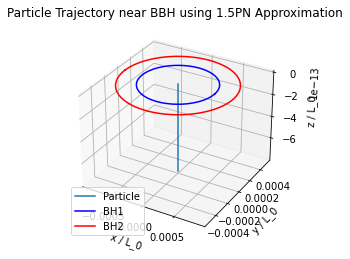

In [4]:
print(np.max(np.abs(x1)), np.max(np.abs(y1)), np.max(np.abs(z1)))
a_x, a_y, a_z = np.max(np.abs(x1)), np.max(np.abs(y1)), np.max(np.abs(z1))
a = [a_x, a_y, a_z]
plot_traj(x1, y1, z1, rs_1_1, rs_2_1, proj="3D")    # Change plot_traj to take in a

In [6]:
plot_traj(x1, y1, z1, rs_1_1, rs_2_1, a=a, proj="3D")

TypeError: plot_traj() got an unexpected keyword argument 'a'

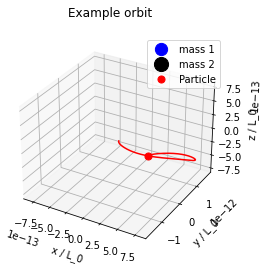

In [8]:
# animate_trajectories(x1, y1, z1, rs_1_1, rs_2_1, a=a, proj="3D", title=f"Example orbit")
animate_trajectories(x1, y1, z1, rs_1_1, rs_2_1, a=a, proj="3D", title=f"Example orbit", save_fig=True)

## Stable L4 point

In [22]:
M, a0 = 1 * SOLARMASS_in_natunits, 1 * AU_in_natunits    # Mass of each BH in binary, initial separation
M1, M2 = 1.0*M, 1.0*M                                    # Masses of each BH in binary
e0 = 0.00                                                # Initial eccentricity, e0=0 => circular, c0->1 => highly elliptical

num_orbits = 1
N = 1000

mu = 0.5
mu2, mu1 = mu, 1-mu
a = 1
x0 = (-a0*mu2+a0*mu1)/2
y0 = (a0*mu2+a0*mu1)*np.sqrt(3)/2
z0 = 0.0

# T = 2*np.pi*np.sqrt(a0**3/M)
v0 = np.sqrt(M/a0)
vx0, vy0, vz0 = -v0, 0.0, 0.0

q0 = [0.0, x0 , y0 , z0]                                   # Initial position of particle
p0 = [1.0, vx0, vy0, vz0]                                  # Initial velocity of particle

# Spin
chi1, chi2 = 0.0, 0.0
S1, S2 = np.array([0,0,0]), np.array([0,0,0])

x1, y1, z1, rs_1_1, rs_2_1, vs_1_1, vs_2_1, vs_12_1, Param_1, sol_1 = run_simulation(T_0=T_0, a0=a0, M1=M1, M2=M2, e0=e0, num_orbits=num_orbits, N=N, q0=q0, p0=p0, chi1=chi1, chi2=chi2, S1=S1, S2=S2)


Delta 0.0007074654360124786


 69%|██████▉   | 688/1000 [03:16<01:29,  3.50it/s]

Particle ejected
Final position: [-3.69556686e-05 -8.45564989e-06  0.00000000e+00]
Time taken: N=688 out of N=1000
This corresonds to about 0.487T_0
Ending program


3.695566855726043e-05 1.3790045359677987e-05 0.0


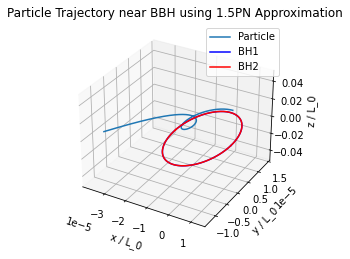

In [23]:
print(np.max(np.abs(x1)), np.max(np.abs(y1)), np.max(np.abs(z1)))
a_x, a_y, a_z = np.max(np.abs(x1)), np.max(np.abs(y1)), np.max(np.abs(z1))
a = [a_x, a_y, a_z]
plot_traj(x1, y1, z1, rs_1_1, rs_2_1, proj="3D")    # Change plot_traj to take in a

## Gravitational wave losses

In [14]:
# 300km ~ 2e-6 AU ~ 100 Schwarzschild radii

M, a0 = 1 * SOLARMASS_in_natunits, 1e-6 * AU_in_natunits    # Mass of each BH in binary, initial separation
M1, M2 = 1.5*M, 0.5*M                                    # Masses of each BH in binary
e0 = 0.75                                                # Initial eccentricity, e0=0 => circular, c0->1 => highly elliptical

num_orbits = 4
N = 100


q0 = [0.0, 0.0, 0.0, 0.0]                                  # Initial position of particle
p0 = [1.0, 0.0, 0.0, 0.0]                                  # Initial velocity of particle

# Spin
chi1, chi2 = 0.0, 0.0
S1, S2 = np.array([0,0,0]), np.array([0,0,0])

xGW, yGW, zGW, rs_1GW, rs_2GW, vs_1GW, vs_2GW, vs_12_GW, Param_1GW, sol_GW = run_simulation(T_0=T_0, a0=a0, M1=M1, M2=M2, e0=e0, num_orbits=num_orbits, N=N, q0=q0, p0=p0, chi1=chi1, chi2=chi2, S1=S1, S2=S2)


Delta 2.8298617440499146e-11


  0%|          | 0/100 [00:00<?, ?it/s]

100%|██████████| 100/100 [01:03<00:00,  1.58it/s]


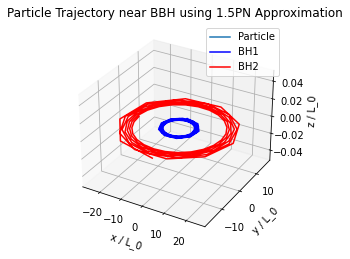

In [15]:
plot_traj(xGW, yGW, zGW, rs_1GW, rs_2GW, proj="3D")    # Change plot_traj to take in a

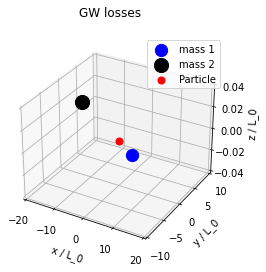

In [17]:
animate_trajectories(xGW[:-3], yGW[:-3], zGW[:-3], rs_1GW, rs_2GW, a=[20,10,0.04],proj="3D", title=f"GW losses", save_fig=True)

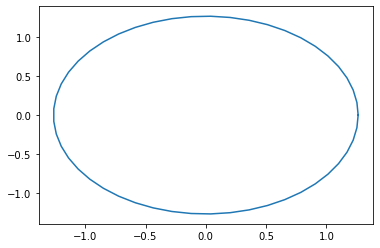

In [73]:
plt.plot(rs_1GW[:,0], rs_1GW[:,1], label="BH1")

In [48]:
print(rs_1GW[-1], rs_2GW[-1])
print(xGW[-2], yGW[-2], zGW[-2])

[ 1.26300012e-05 -3.09345811e-21  0.00000000e+00] [-1.26300012e-05  3.09345811e-21  0.00000000e+00]
-9.801792111411809e-06 3.738289092273808e-06 0.0


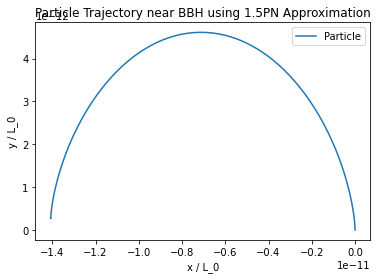

In [55]:
plot_traj(xGW, yGW, zGW, rs_1GW, rs_2GW, proj="2D")

## Spin orbit effects

## Comparison to simple model and error analysis

### L1 Lagrange point

#### Parameters

In [7]:
a0 = AU_in_natunits * 1.0
M = SOLARMASS_in_natunits * 1.0

M1, M2 = 1*M, 1*M                          # Masses of each BH in binary
m1, m2 = M1, M2
Porb0 = (2 * np.pi / np.sqrt(M/a0**3))     # Initial orbital period
e0 = 0.0                                   # Initial eccentricity, e0=0 => circular, c0->1 => highly elliptical

num_orbits = 1
T = num_orbits * Porb0
N = 1000
dt = T / N
delta = dt
t = np.linspace(0, T, N)

q0 = [0.0,0,0,0.0]                          # Initial position of particle
p0 = [1.0,0,0.00,0.0]                       # Initial velocity of particle

# Position vectors of each black hole
rs_1, rs_2 = get_orbital_evolution(M1, M2, Porb0, e0, T, N)

# Velocity vectors of each black hole in binary
vs_1, vs_2 = get_orbital_velocity(rs_1, rs_2, T, N)

# Calculate relative position and velocity of binaries
rs_12 = (rs_1 - rs_2)
Rs_12 = np.linalg.norm(rs_12, axis=1)[:,None]
ns_12 = rs_12 / Rs_12
vs_12 = vs_1 - vs_2
Vs_12 = np.linalg.norm(vs_12, axis=1)

# Parameter values
x_0 = q0[1:]              # Initial postion of particle
r1_0 = rs_1[0,:]          # Initial position of particle at x_0 relative to BH1
r2_0 = rs_2[0,:]          # Initial position of particle at x_0 relative to BH2
r12_0 = rs_12[0,:]        # Relative positions of BHs at t = 0
v1_0 = vs_1[0,:]          # Initial velocity of particle at x_0 relative to BH1
v2_0 = vs_2[0,:]
v12_0 = vs_12[0,:]

# Spin
chi1, chi2 = -1.0, 1.0
S1, S2 = np.array([1,-1,2]), np.array([-1,-2,3])
S1, S2 = chi1 * M**2 * c_SI * 100 * S1 / mag(S1), chi2 * M**2 * c_SI * 100 * S2 / mag(S2)
S1, S2 = np.array([0,0,1]), np.array([0,0,1])
S1, S2 = np.array([0,0,0]), np.array([0,0,0])

Param = [x_0, m1, m2, r1_0, r2_0, r12_0, v1_0, v2_0, v12_0, S1, S2]

### Run simulation

In [8]:
sol = geodesic_integrator(N,delta,omega,q0,p0,Param,order,rs_1=rs_1,rs_2=rs_2,rs_12=rs_12,vs_1=vs_1,vs_2=vs_2,vs_12=vs_12,update_parameters=True)

Delta 0.0010005072145190424


 56%|█████▌    | 559/1000 [02:49<02:13,  3.31it/s]

Particle ejected
Final position: [-1.92554408e-05 -2.49904948e-05  0.00000000e+00]
Time taken: N=559 out of N=1000
This corresonds to about 0.559T_0
Ending program


### Plotting

KeyError: 'm1'

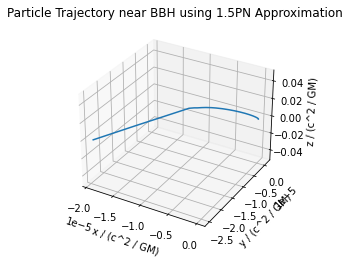

In [24]:
# Get the position and momentum of the particle in the first phase space
sol = np.array(sol[1:])

qs = sol[:,0,:]
ps = sol[:,1,:]

x, y, z = qs[:,1], qs[:,2], qs[:,3]

plot_traj(x, y, z, rs_1, rs_2)


pos = Newtonian_orbit(rs_1, rs_2, m1, m2, q0, p0, dt, N)
x_newton = pos[:,0]
y_newton = pos[:,1]
z_newton = pos[:,2]

plot_traj(x_newton, y_newton, z_newton, rs_1, rs_2)



### Animation

KeyboardInterrupt: 

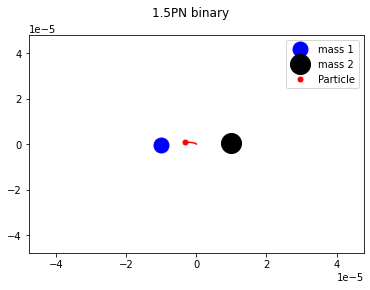

In [23]:
import os

anim_filename = "test_zjupyter"

cwd = os.getcwd()
parent_dir = os.path.dirname(cwd)
anim_path = os.path.join(parent_dir, "animations", anim_filename)

ani = animate_trajectories(x,y,z,rs_1,rs_2,a=3*a0,save_fig=anim_path)

NameError: name 'SOLARMASS_in_natunits' is not defined

In [ ]:
# plot_traj(x1, y1, z1, rs_1_1, rs_2_1)
animate_trajectories(x1,y1,z1,rs_1_1,rs_2_1, save_fig=f"test_znaming_optional", no_parent="True")